In [1]:
import json

resultsCNN = {}
resultsML = {}
resultsDL = {}


with open('resultsCNNAll.json') as json_file:
    resultsCNN = json.load(json_file)

with open('resultsDeepLearningC.json') as json_file:
    resultsDL = json.load(json_file)

with open('resultsMachineLearning.json') as json_file:
    resultsML = json.load(json_file)

#print(json.dumps(resultsCNN, indent=1))
print(json.dumps(resultsDL, indent=1))
print(json.dumps(resultsML, indent=1))



{
 "Raw": {
  "DeepLearning": {
   "CGBR": {
    "MLP": {
     "100": {
      "r2": -64.701839859492,
      "loss": 18.549575805664062,
      "mse": 18.549575805664062,
      "mae": 4.2672224044799805,
      "rmse": 4.30692195892334
     },
     "500": {
      "r2": -119.53302798603754,
      "loss": 85.44715881347656,
      "mse": 85.44715881347656,
      "mae": 9.205338478088379,
      "rmse": 9.243762969970703
     }
    },
    "FCNN": {
     "100": {
      "r2": -5.38604791020252,
      "loss": 2.576350450515747,
      "mse": 2.576350450515747,
      "mae": 1.3141248226165771,
      "rmse": 1.6051013469696045
     },
     "500": {
      "r2": -4.810571955260061,
      "loss": 2.7025272846221924,
      "mse": 2.7025272846221924,
      "mae": 1.357565999031067,
      "rmse": 1.6439365148544312
     }
    },
    "DeepSVM": {
     "100": {
      "r2": -4.055664748611606,
      "loss": 2.6975085735321045,
      "mse": 2.6625924110412598,
      "mae": 1.2837483882904053,
      "rmse": 1.

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap4(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    # Create a pivot table with the R2 values and R2 rank values
    pivot_table_r2 = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])
    pivot_table_r2_rank = pd.pivot_table(r2_df, values='r2_rank', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(12,13)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table_r2_rank, cmap="YlGnBu", annot=pivot_table_r2, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2 Rank'})
    ax.set_title("R2 Comparison by Model and Epoch")
    ax.set_xlabel("Model and Epoch")
    ax.set_ylabel("Experiment and Type of Experiment")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_r2_barplot2(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Get the unique model names
    unique_models = r2_df['model_name'].unique()

    # Create subplots for each model
    fig, axs = plt.subplots(len(unique_models), figsize=(12, 6 * len(unique_models)))

    for idx, model_name in enumerate(unique_models):
        # Filter data for the current model
        model_data = r2_df[r2_df['model_name'] == model_name]

        # Create a pivot table with the R2 values
        pivot_table_r2 = pd.pivot_table(model_data, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['epoch'])

        # Create the bar plot
        ax = axs[idx]
        pivot_table_r2.plot.bar(ax=ax)

        # Set the title and labels
        ax.set_title(f"R2 Comparison for Model {model_name}")
        ax.set_xlabel("Experiment and Type of Experiment")
        ax.set_ylabel("R2")

        # Rotate the x-axis labels to improve readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your results_dict and fruitInitial
# plot_r2_barplots(results_dict, fruitInitial)


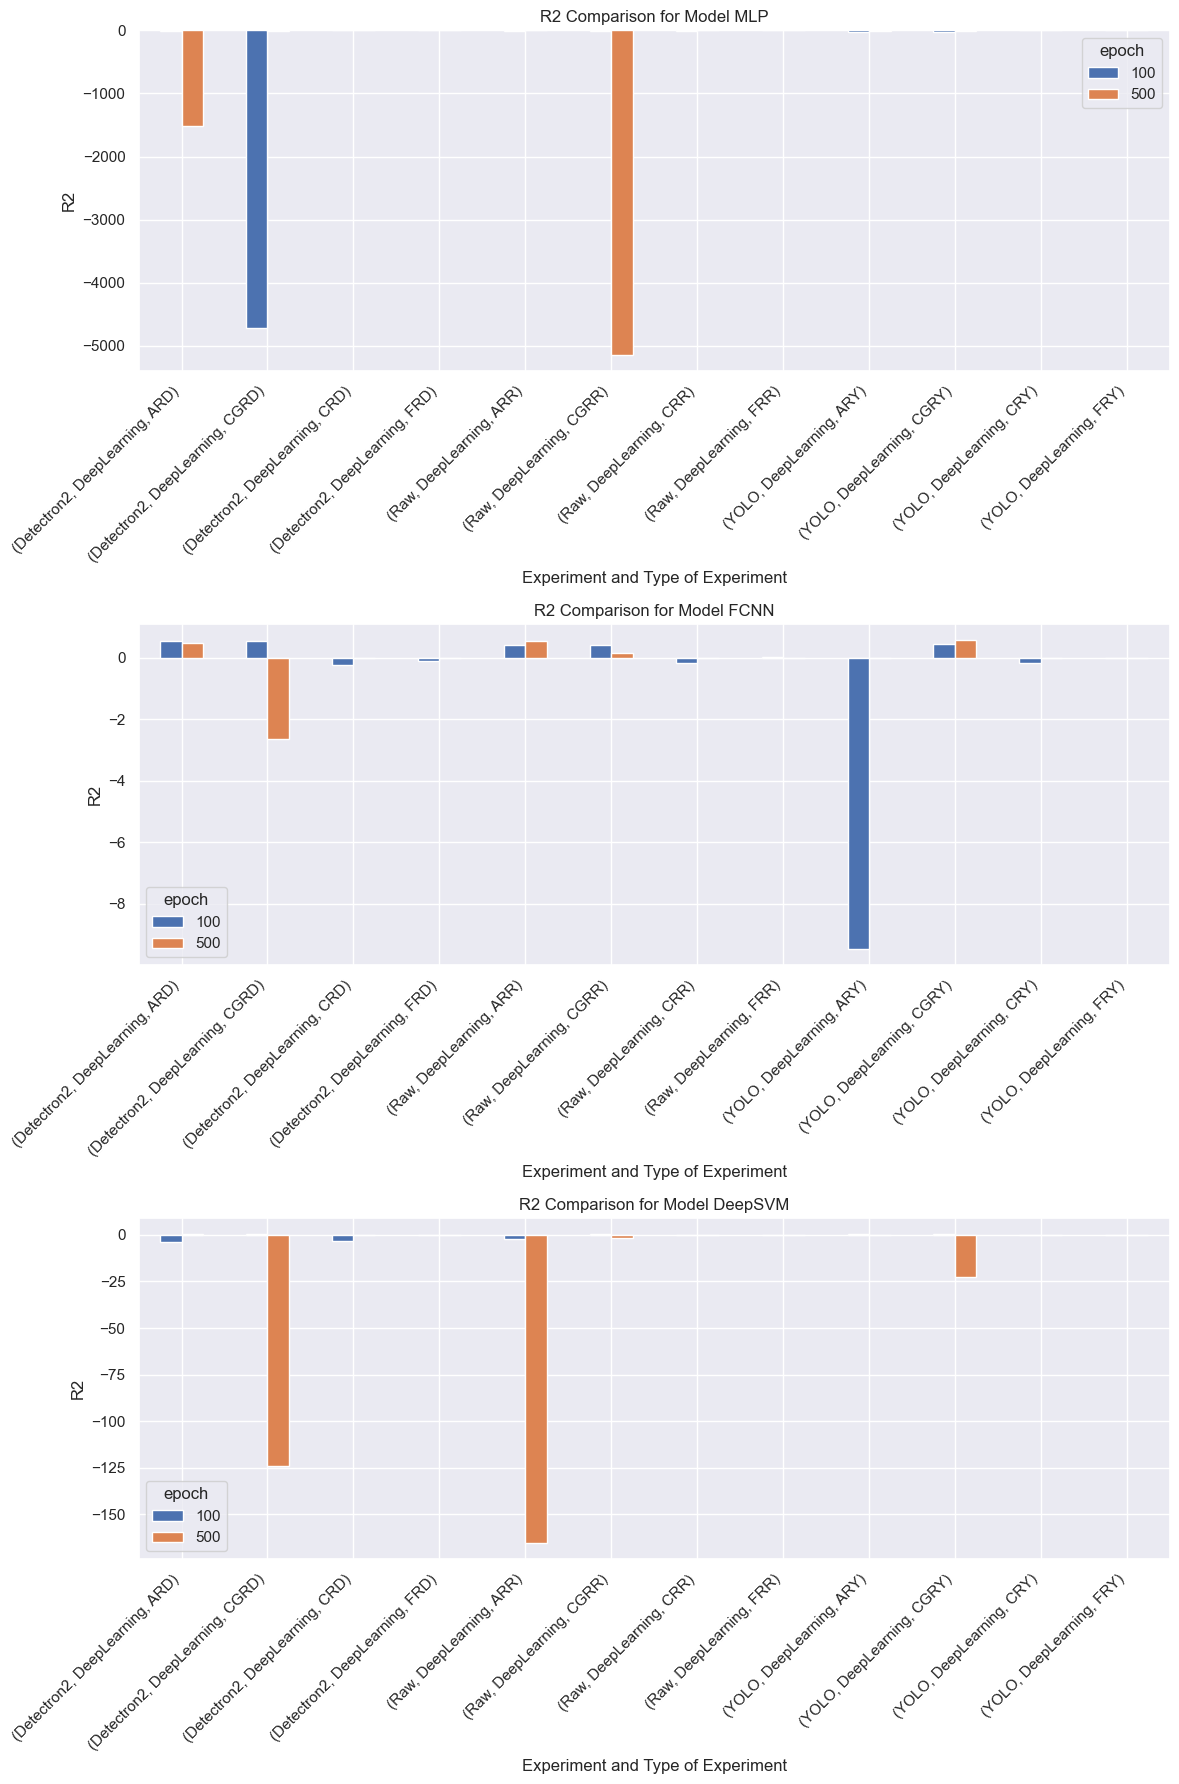

In [34]:
plot_r2_barplot2(resultsDL, 'R')


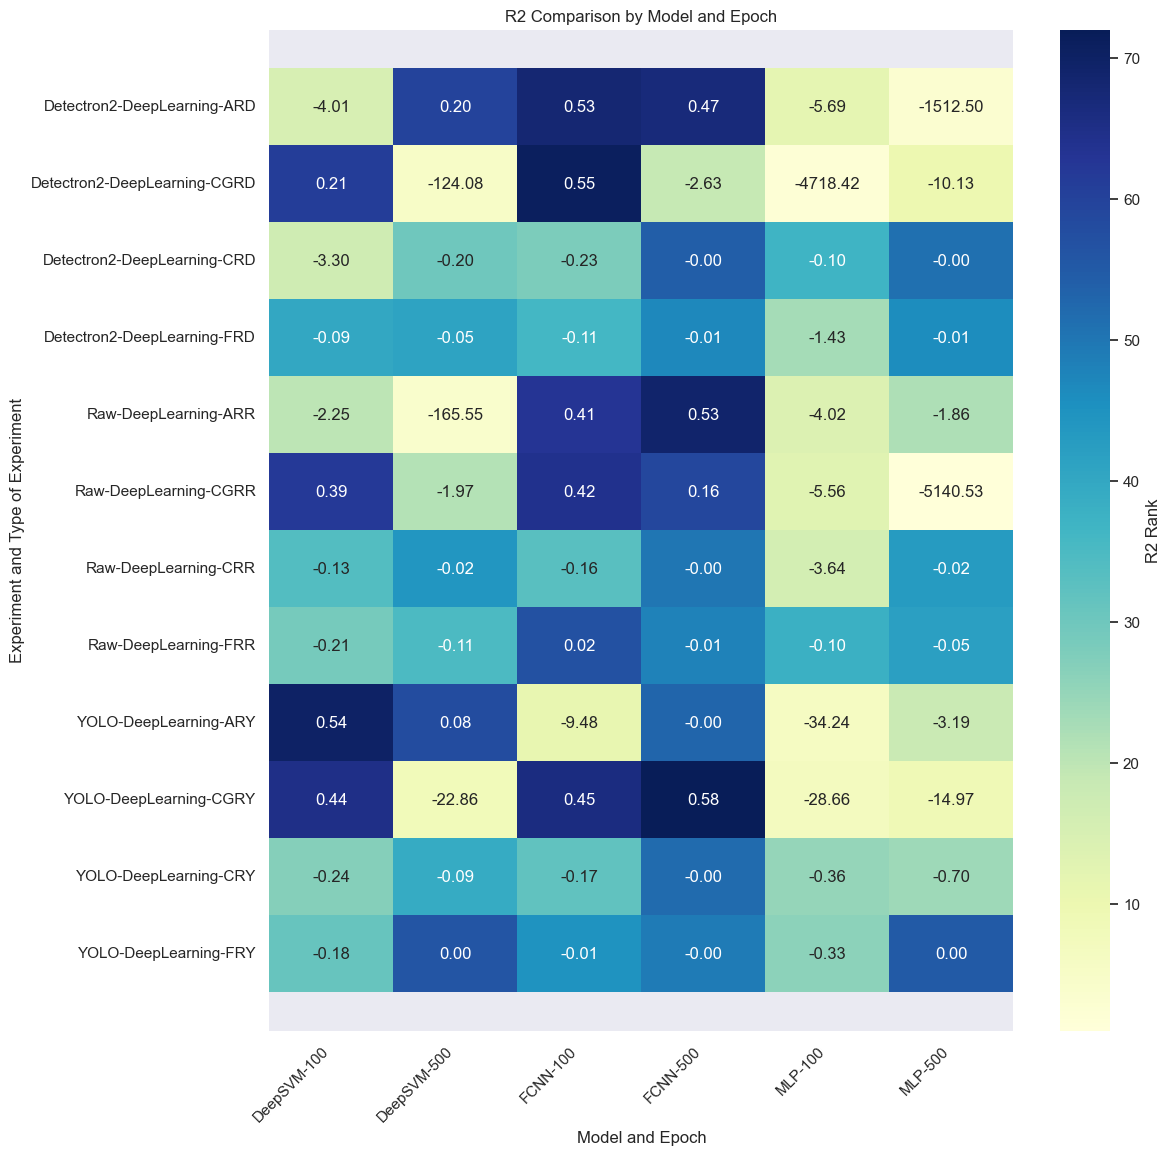

In [32]:
plot_r2_heatmap4(resultsDL, 'R')


In [27]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap3(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    # Create a pivot table with the R2 rank values
    pivot_table = pd.pivot_table(r2_df, values='r2_rank', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(12,13)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2 Rank'})
    ax.set_title("R2 Rank Comparison by Model and Epoch")
    ax.set_xlabel("Model and Epoch")
    ax.set_ylabel("Experiment and Type of Experiment")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


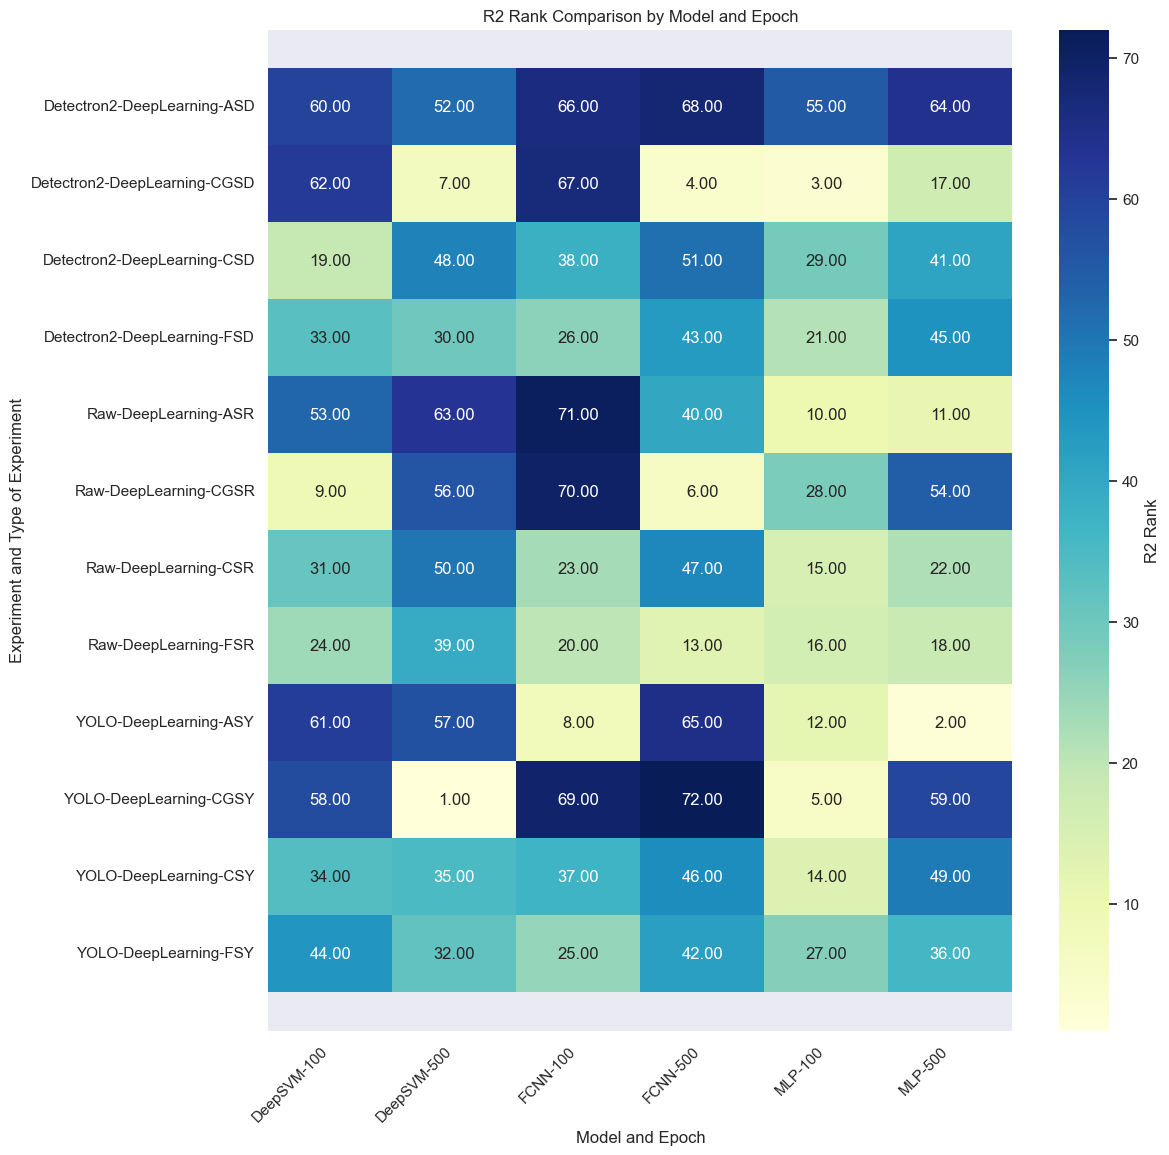

In [28]:
plot_r2_heatmap3(resultsDL, 'S')


In [25]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap2(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    loss_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                #print(dataset_name[::-1][1])
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)
    #loss_df = pd.DataFrame(loss_data)
    #r2_df['r2_rank'] = r2_df['r2'].rank()


    # Create a pivot table with the R2 values, indexed by experiment, type of experiment, model, and number of epochs
    
    pivot_table = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmapth
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(12,13)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2'})
    ax.set_title("R2 Comparison by Model and Epoch")
    ax.set_xlabel("Model and Epoch")
    ax.set_ylabel("Experiment and Type of Experiment")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


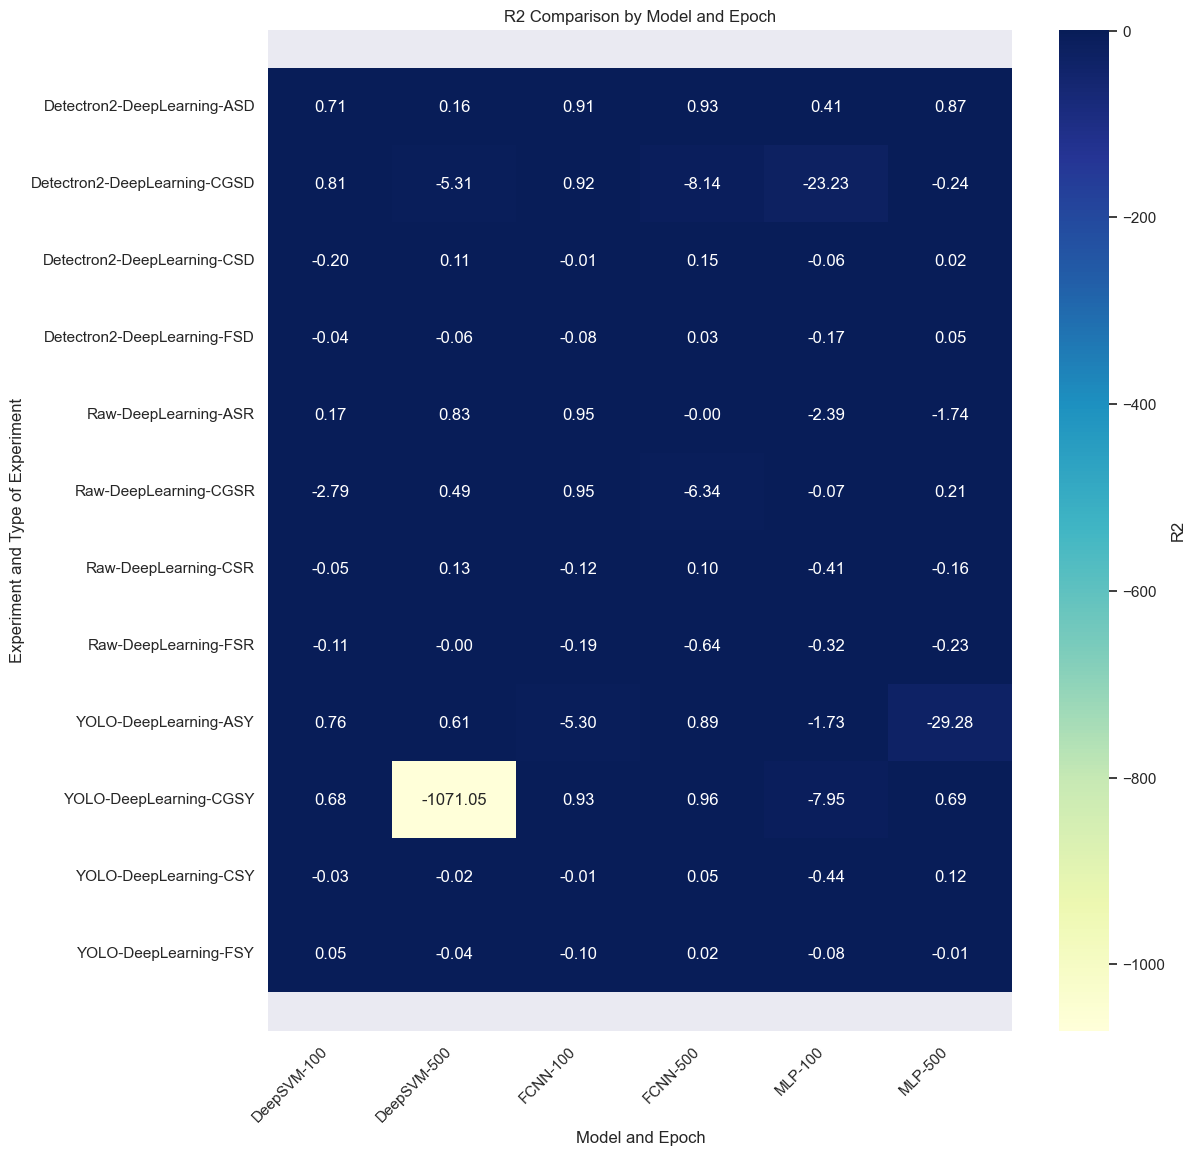

In [26]:
plot_r2_heatmap2(resultsDL, 'S')


In [230]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap(results_dict):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    loss_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                for model_name, model_data in dataset_data.items():
                    for epoch, epoch_data in model_data.items():
                        r2_data.append({
                            'experiment': experiment,
                            'test_name': test_name,
                            'dataset_name': dataset_name,
                            'model_name': model_name,
                            'epoch': epoch,
                            'r2': epoch_data['r2']
                        })

    r2_df = pd.DataFrame(r2_data)
    #loss_df = pd.DataFrame(loss_data)



    # Create a pivot table with the R2 values, indexed by experiment, type of experiment, model, and number of epochs
    
    pivot_table = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmapth
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(12,13)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2'})
    ax.set_title("R2 Comparison by Model and Epoch")
    ax.set_xlabel("Model and Epoch")
    ax.set_ylabel("Experiment and Type of Experiment")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


In [229]:
plot_r2_heatmap

In [151]:
!pip3 install plotly==5.14.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [248]:
import matplotlib.pyplot as plt
import numpy as np

def plot_r2_by_class(results_dict):
    r2_by_class = {}
    for experiment_name, experiment in results_dict.items():
        for test_name, test in experiment.items():
            for dataset_name, dataset in test.items():
                for model_name, model in dataset.items():
                    for epoch, result in model.items():
                        experiment_class = (experiment_name, test_name, dataset_name, model_name, epoch)
                        if experiment_class not in r2_by_class:
                            r2_by_class[experiment_class] = result['r2']
                        else:
                            r2_by_class[experiment_class] += result['r2']

    sorted_r2_by_class = sorted(r2_by_class.items(), key=lambda x: x[1], reverse=True)

    num_classes = len(sorted_r2_by_class)
    x = np.arange(num_classes)
    r2_values = [item[1] for item in sorted_r2_by_class]
    labels = [f"{item[0][0]} {item[0][1]} {item[0][2]} {item[0][3]} {item[0][4]}" for item in sorted_r2_by_class]
    sns.set(rc={'figure.figsize':(40,12)}) #resultsML 8,6 resultsDL 12,13

    plt.bar(x, r2_values)
    plt.xticks(x, labels, rotation=90)
    plt.ylabel('R2')
    plt.show()


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_r2_heatmap_3d(results_dict):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                for model_name, model_data in dataset_data.items():
                    for epoch, epoch_data in model_data.items():
                        r2_data.append({
                            'experiment': experiment,
                            'test_name': test_name,
                            'dataset_name': dataset_name,
                            'model_name': model_name,
                            'epoch': epoch,
                            'r2': epoch_data['r2']
                        })

    r2_df = pd.DataFrame(r2_data)

    print(r2_df)

    # Create a pivot table with the R2 values, indexed by experiment, type of experiment, model, and number of epochs
    pivot_table = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])
    
    # Create the 3D heatmap
    fig = plt.figure(figsize=(12, 13))
    ax = fig.add_subplot(111, projection='3d')

    xticks = np.arange(len(pivot_table.columns.levels[0]))
    yticks = np.arange(len(pivot_table.index))
    xpos, ypos = np.meshgrid(xticks, yticks, indexing='ij')
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = np.zeros(len(xpos))

    dx = 0.5 * np.ones_like(zpos)
    dy = 0.5 * np.ones_like(zpos)
    dz = pivot_table.values.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)

    ax.set_xticks(xticks)
    ax.set_xticklabels(pivot_table.columns.levels[0])
    ax.set_xlabel('Model and Epoch')

    ax.set_yticks(yticks)
    ax.set_yticklabels(pivot_table.index)
    ax.set_ylabel('Experiment and Type of Experiment')

    ax.set_zlabel('R2')

    ax.set_title("R2 Comparison by Model and Epoch")

    plt.show()
    


    experiment        test_name dataset_name model_name epoch        r2
0          Raw  MachineLearning         CGBR     linear     1  0.985326
1          Raw  MachineLearning         CGBR        SVR     1  0.977957
2          Raw  MachineLearning         CGRR     linear     1  0.485427
3          Raw  MachineLearning         CGRR        SVR     1  0.572087
4          Raw  MachineLearning         CGSR     linear     1  0.921792
5          Raw  MachineLearning         CGSR        SVR     1  0.963203
6         YOLO  MachineLearning         CGBY     linear     1  0.982495
7         YOLO  MachineLearning         CGBY        SVR     1  0.985186
8         YOLO  MachineLearning         CGRY     linear     1  0.499399
9         YOLO  MachineLearning         CGRY        SVR     1  0.460026
10        YOLO  MachineLearning         CGSY     linear     1  0.959239
11        YOLO  MachineLearning         CGSY        SVR     1  0.944395
12  Detectron2  MachineLearning         CGBD     linear     1  0

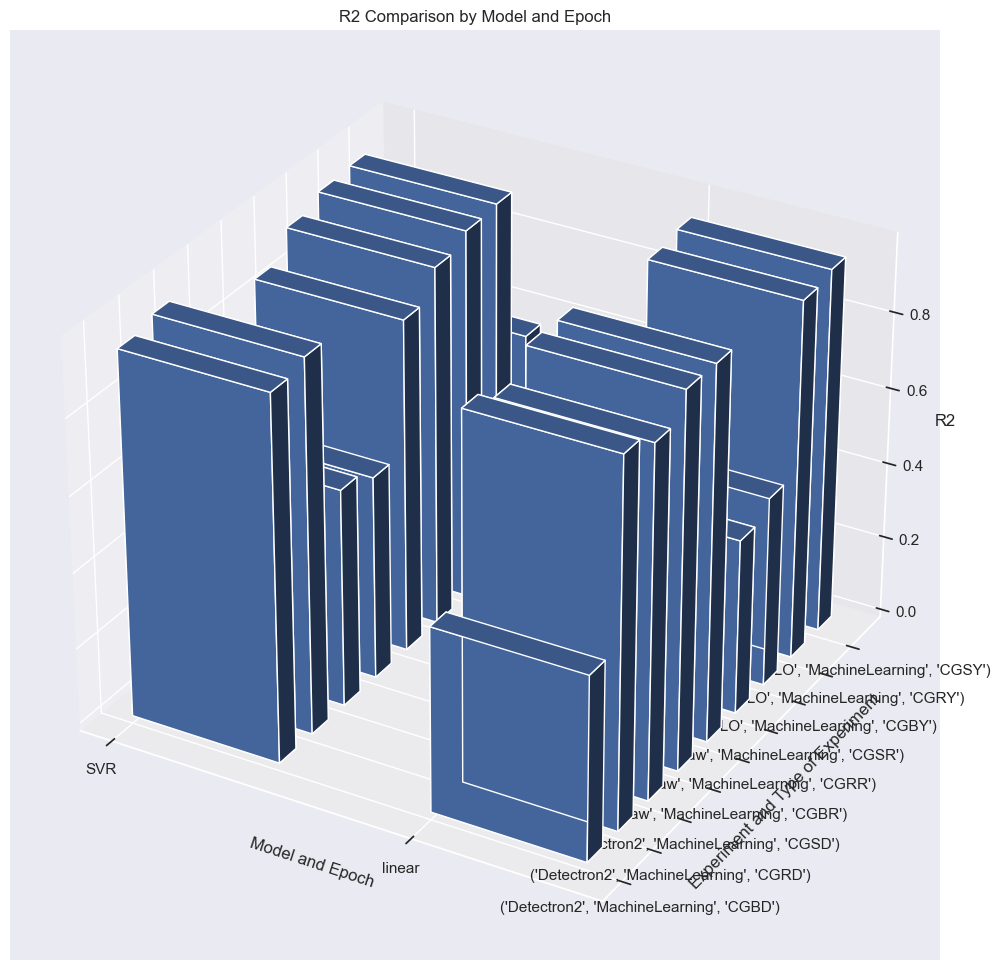

In [239]:
plot_r2_heatmap_3d(resultsML)


In [226]:
plot_r2_heatmap_3d(resultsDL)



     experiment     test_name dataset_name model_name epoch          r2
0           Raw  DeepLearning         CGBR        MLP   100  -64.701840
1           Raw  DeepLearning         CGBR        MLP   500 -119.533028
2           Raw  DeepLearning         CGBR       FCNN   100   -5.386048
3           Raw  DeepLearning         CGBR       FCNN   500   -4.810572
4           Raw  DeepLearning         CGBR    DeepSVM   100   -4.055665
..          ...           ...          ...        ...   ...         ...
211  Detectron2  DeepLearning          ASD        MLP   500    0.869933
212  Detectron2  DeepLearning          ASD       FCNN   100    0.910924
213  Detectron2  DeepLearning          ASD       FCNN   500    0.927859
214  Detectron2  DeepLearning          ASD    DeepSVM   100    0.707871
215  Detectron2  DeepLearning          ASD    DeepSVM   500    0.163382

[216 rows x 6 columns]


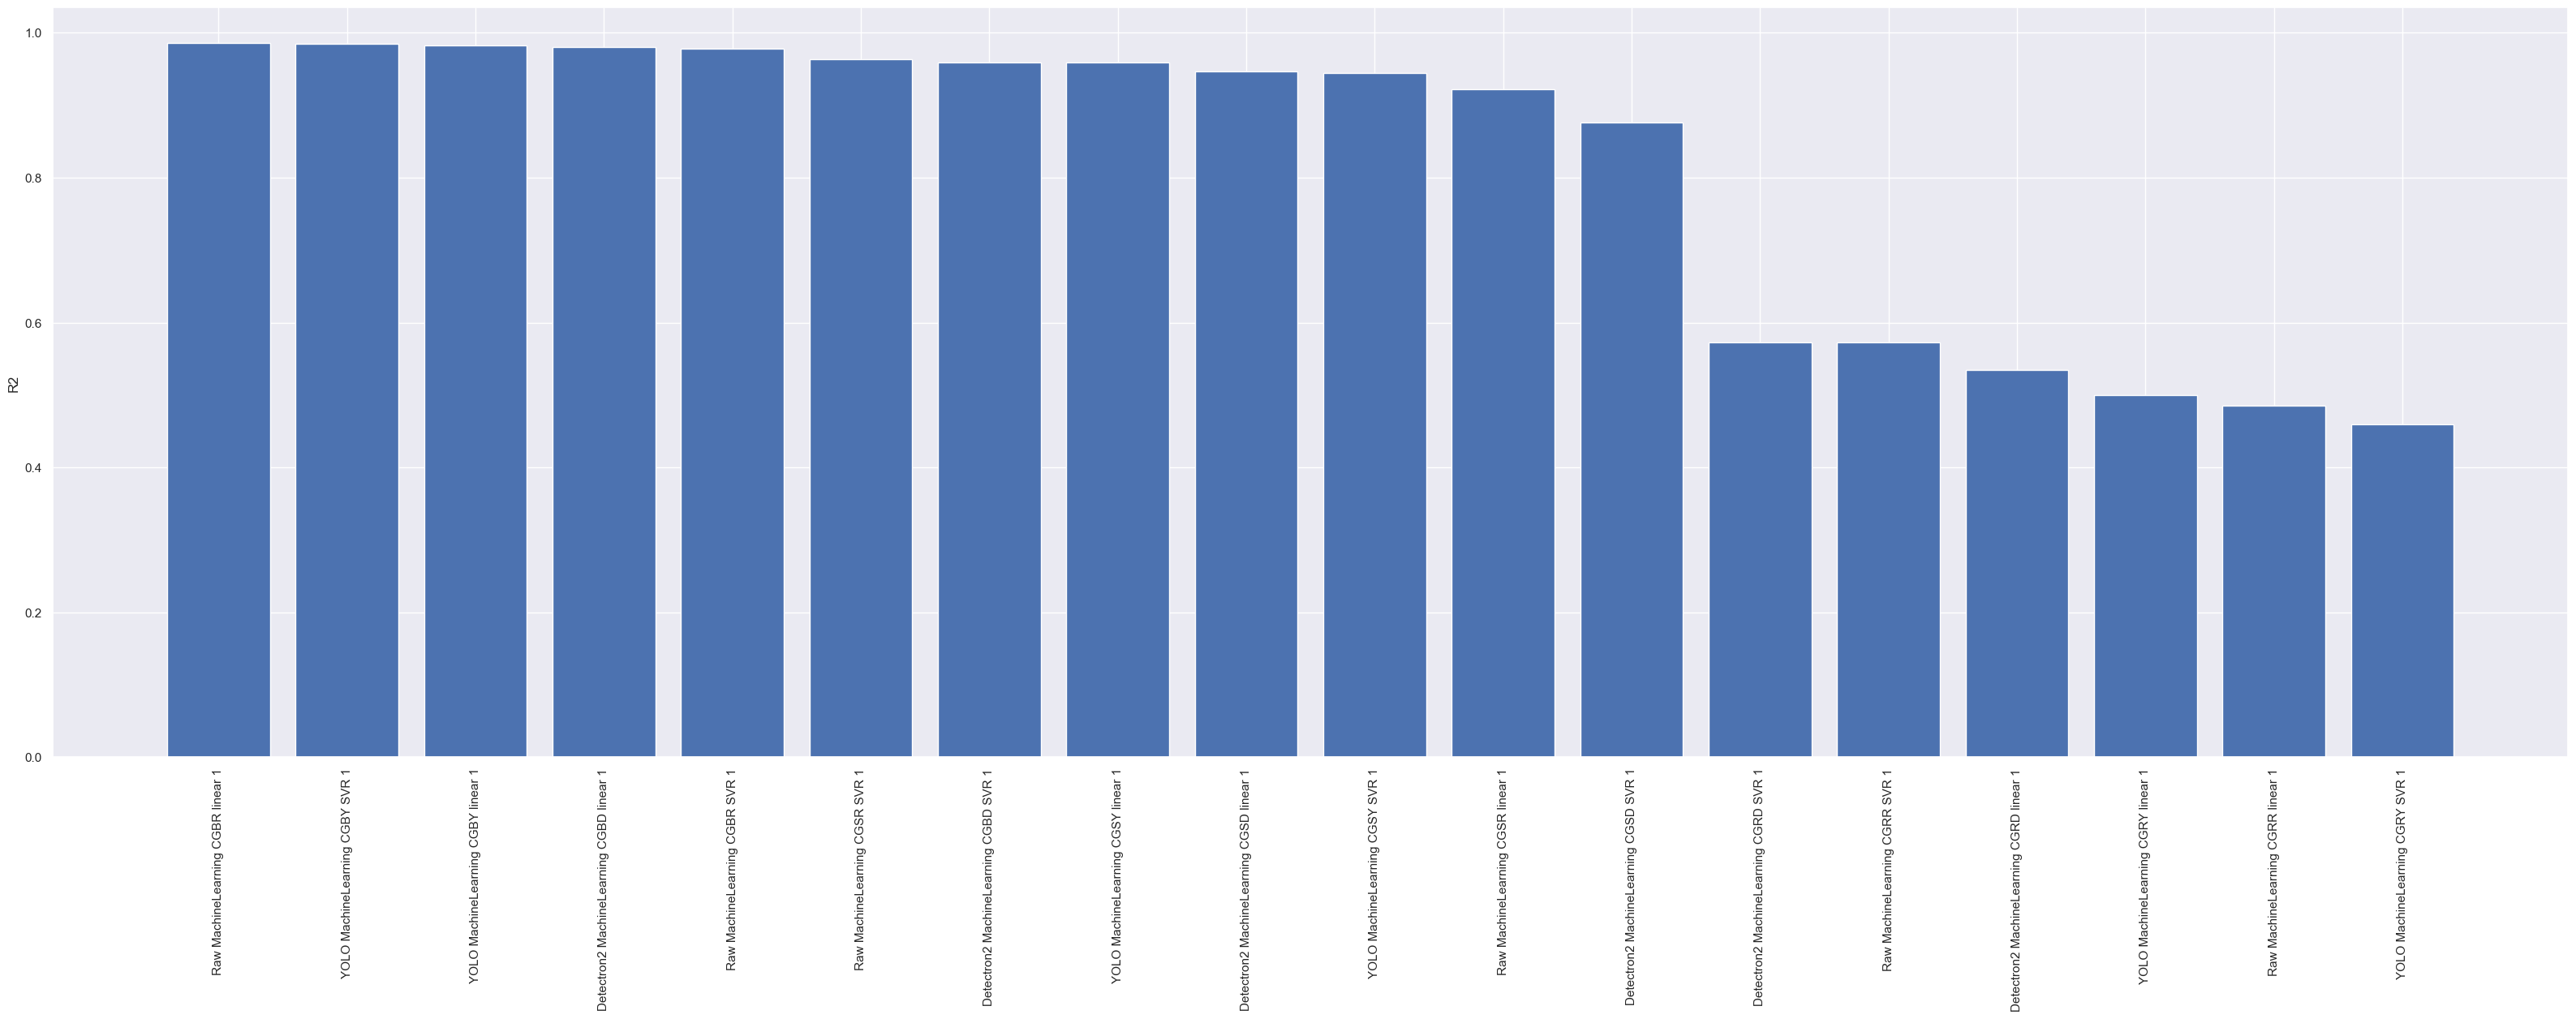

In [250]:
plot_r2_by_class(resultsML)

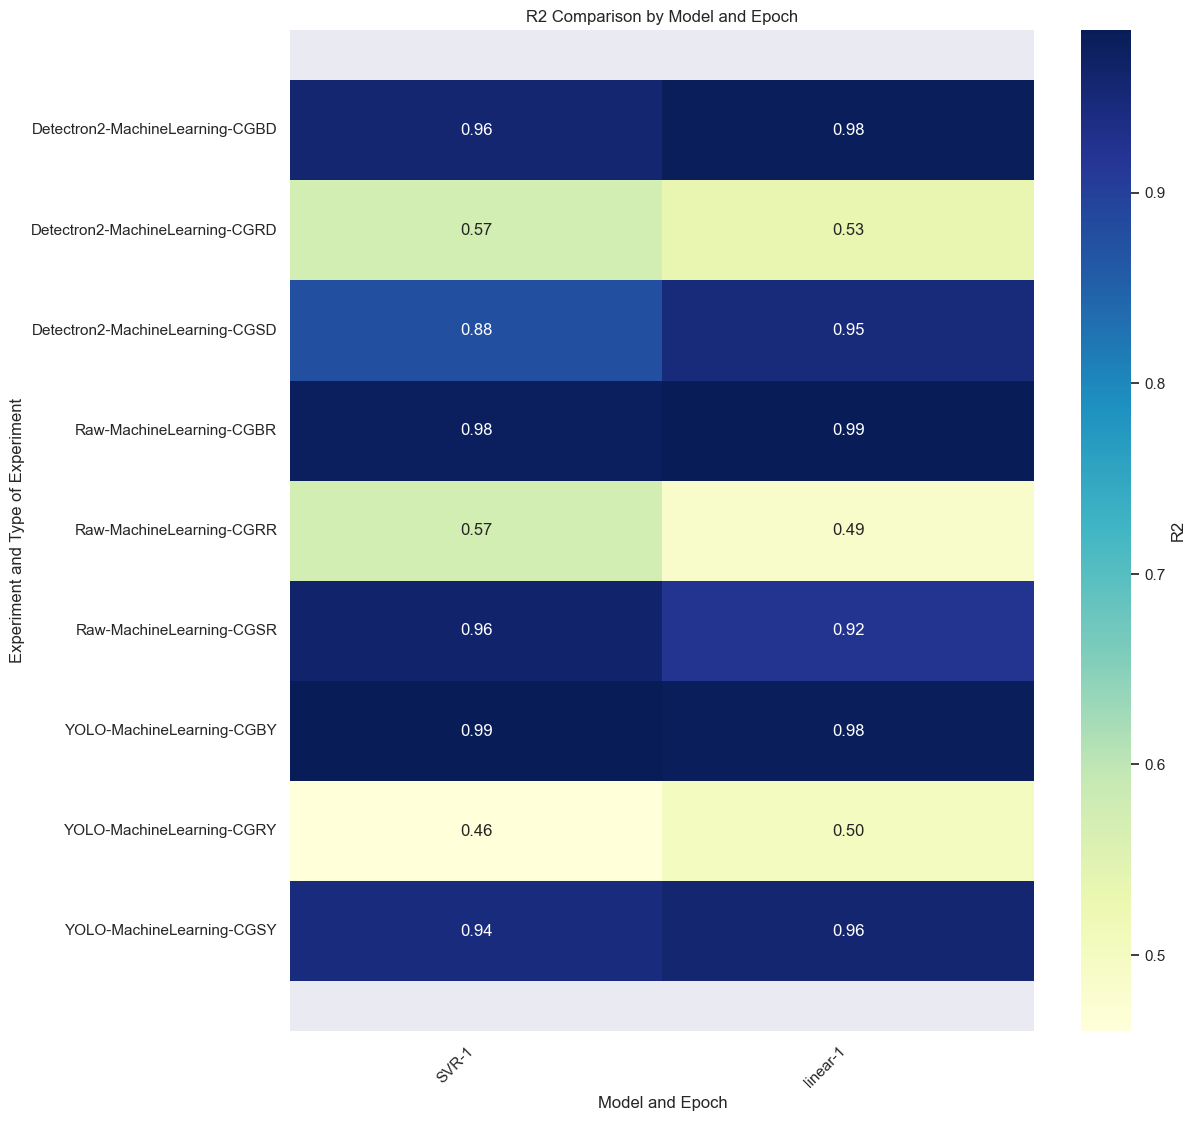

In [232]:
plot_r2_heatmap(resultsML)


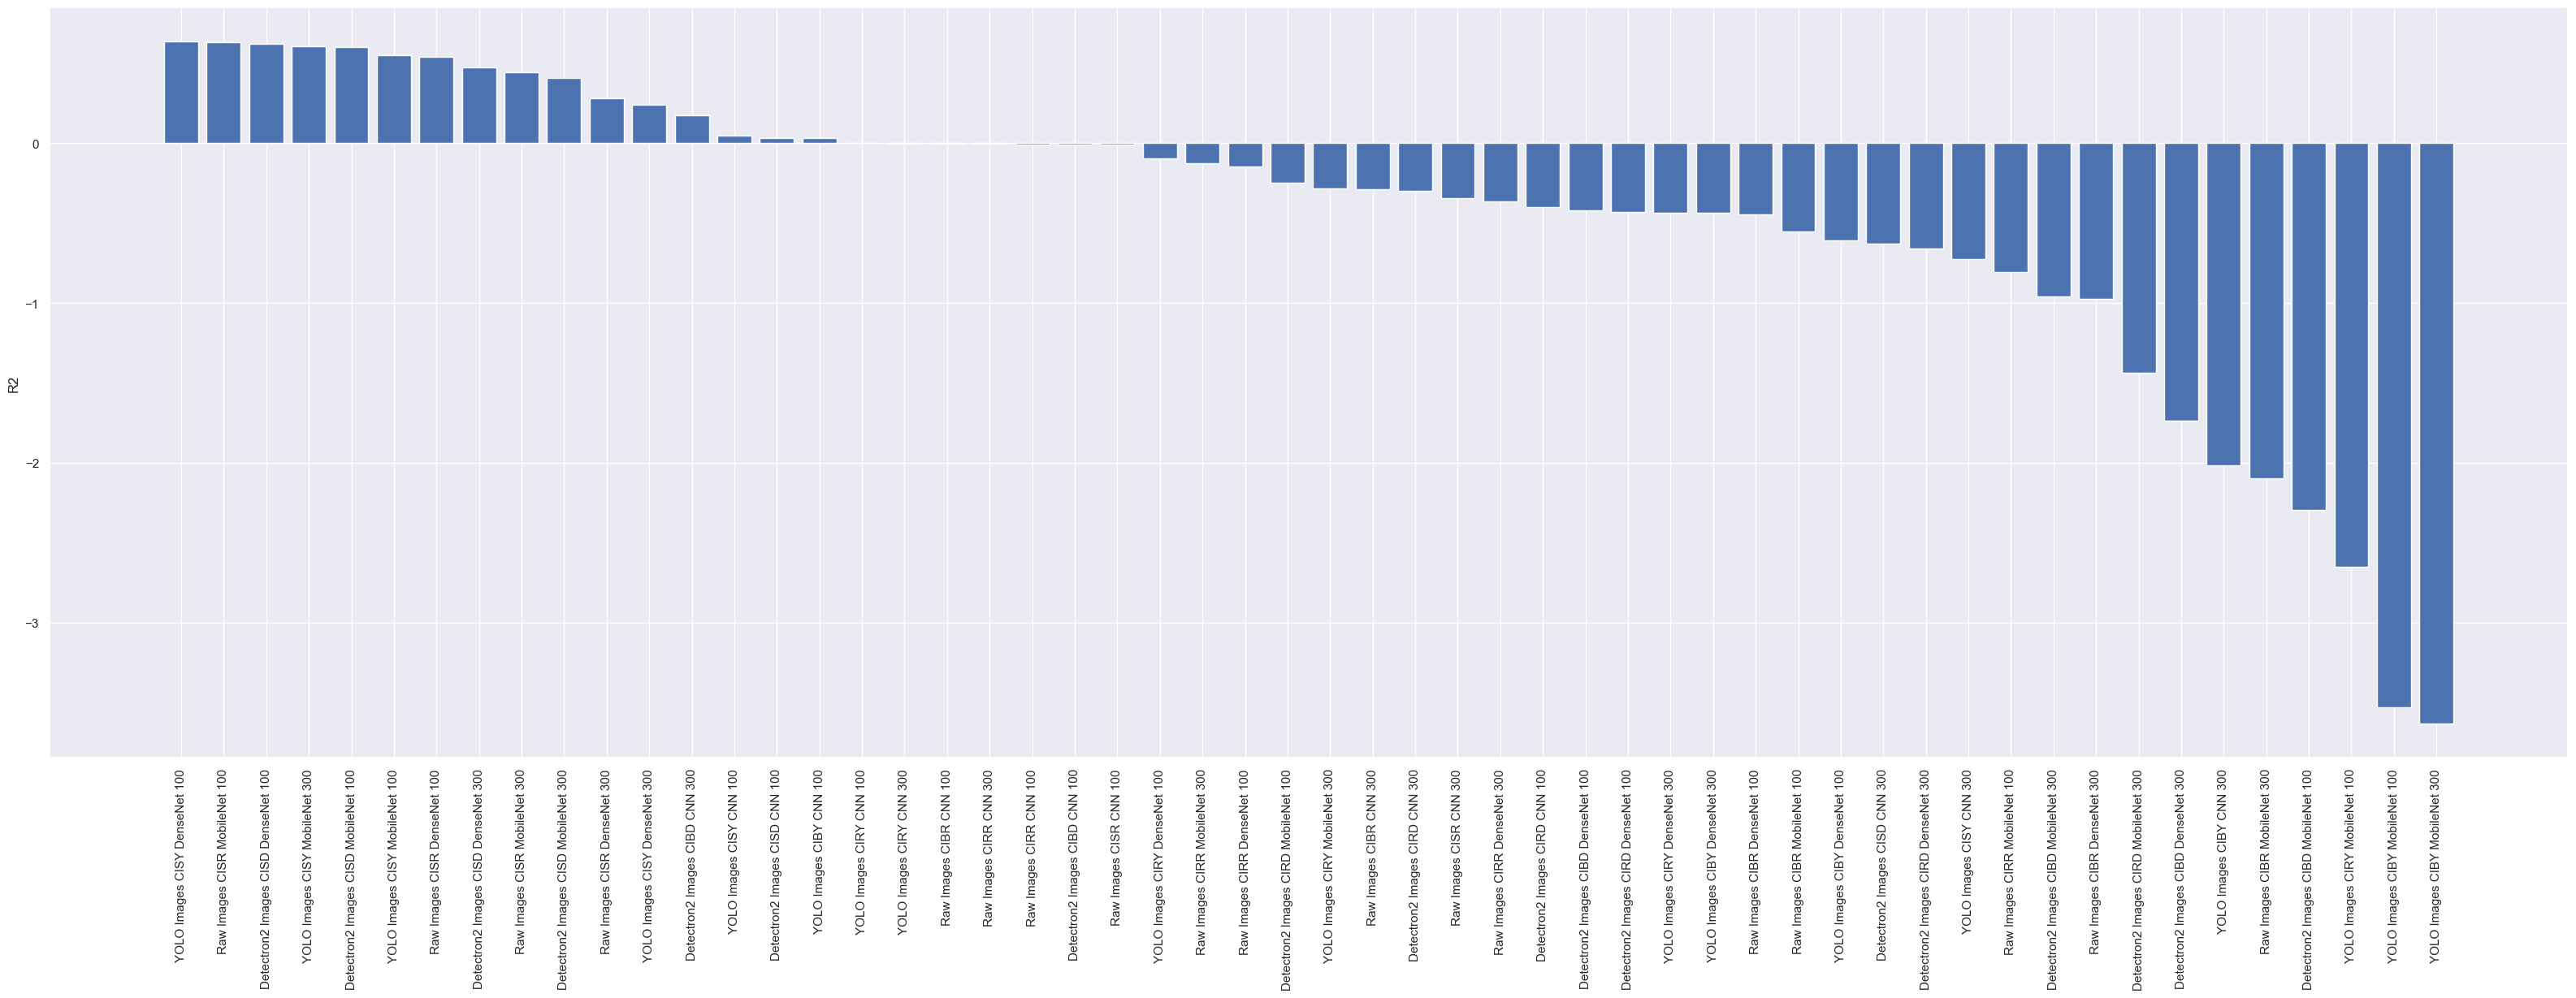

In [251]:
plot_r2_by_class(resultsCNN)

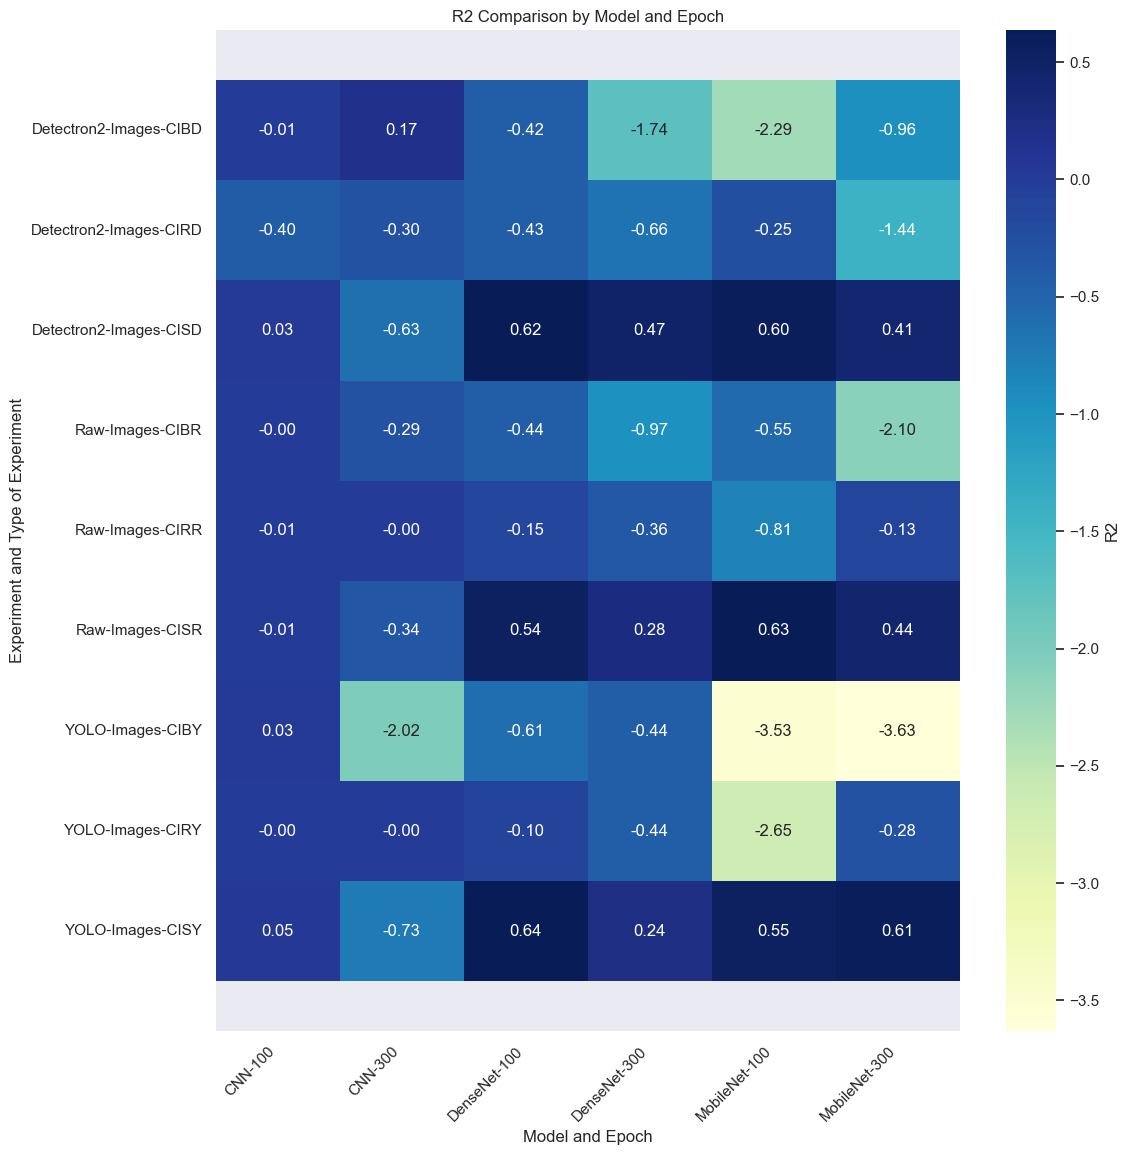

In [231]:
plot_r2_heatmap(resultsCNN)


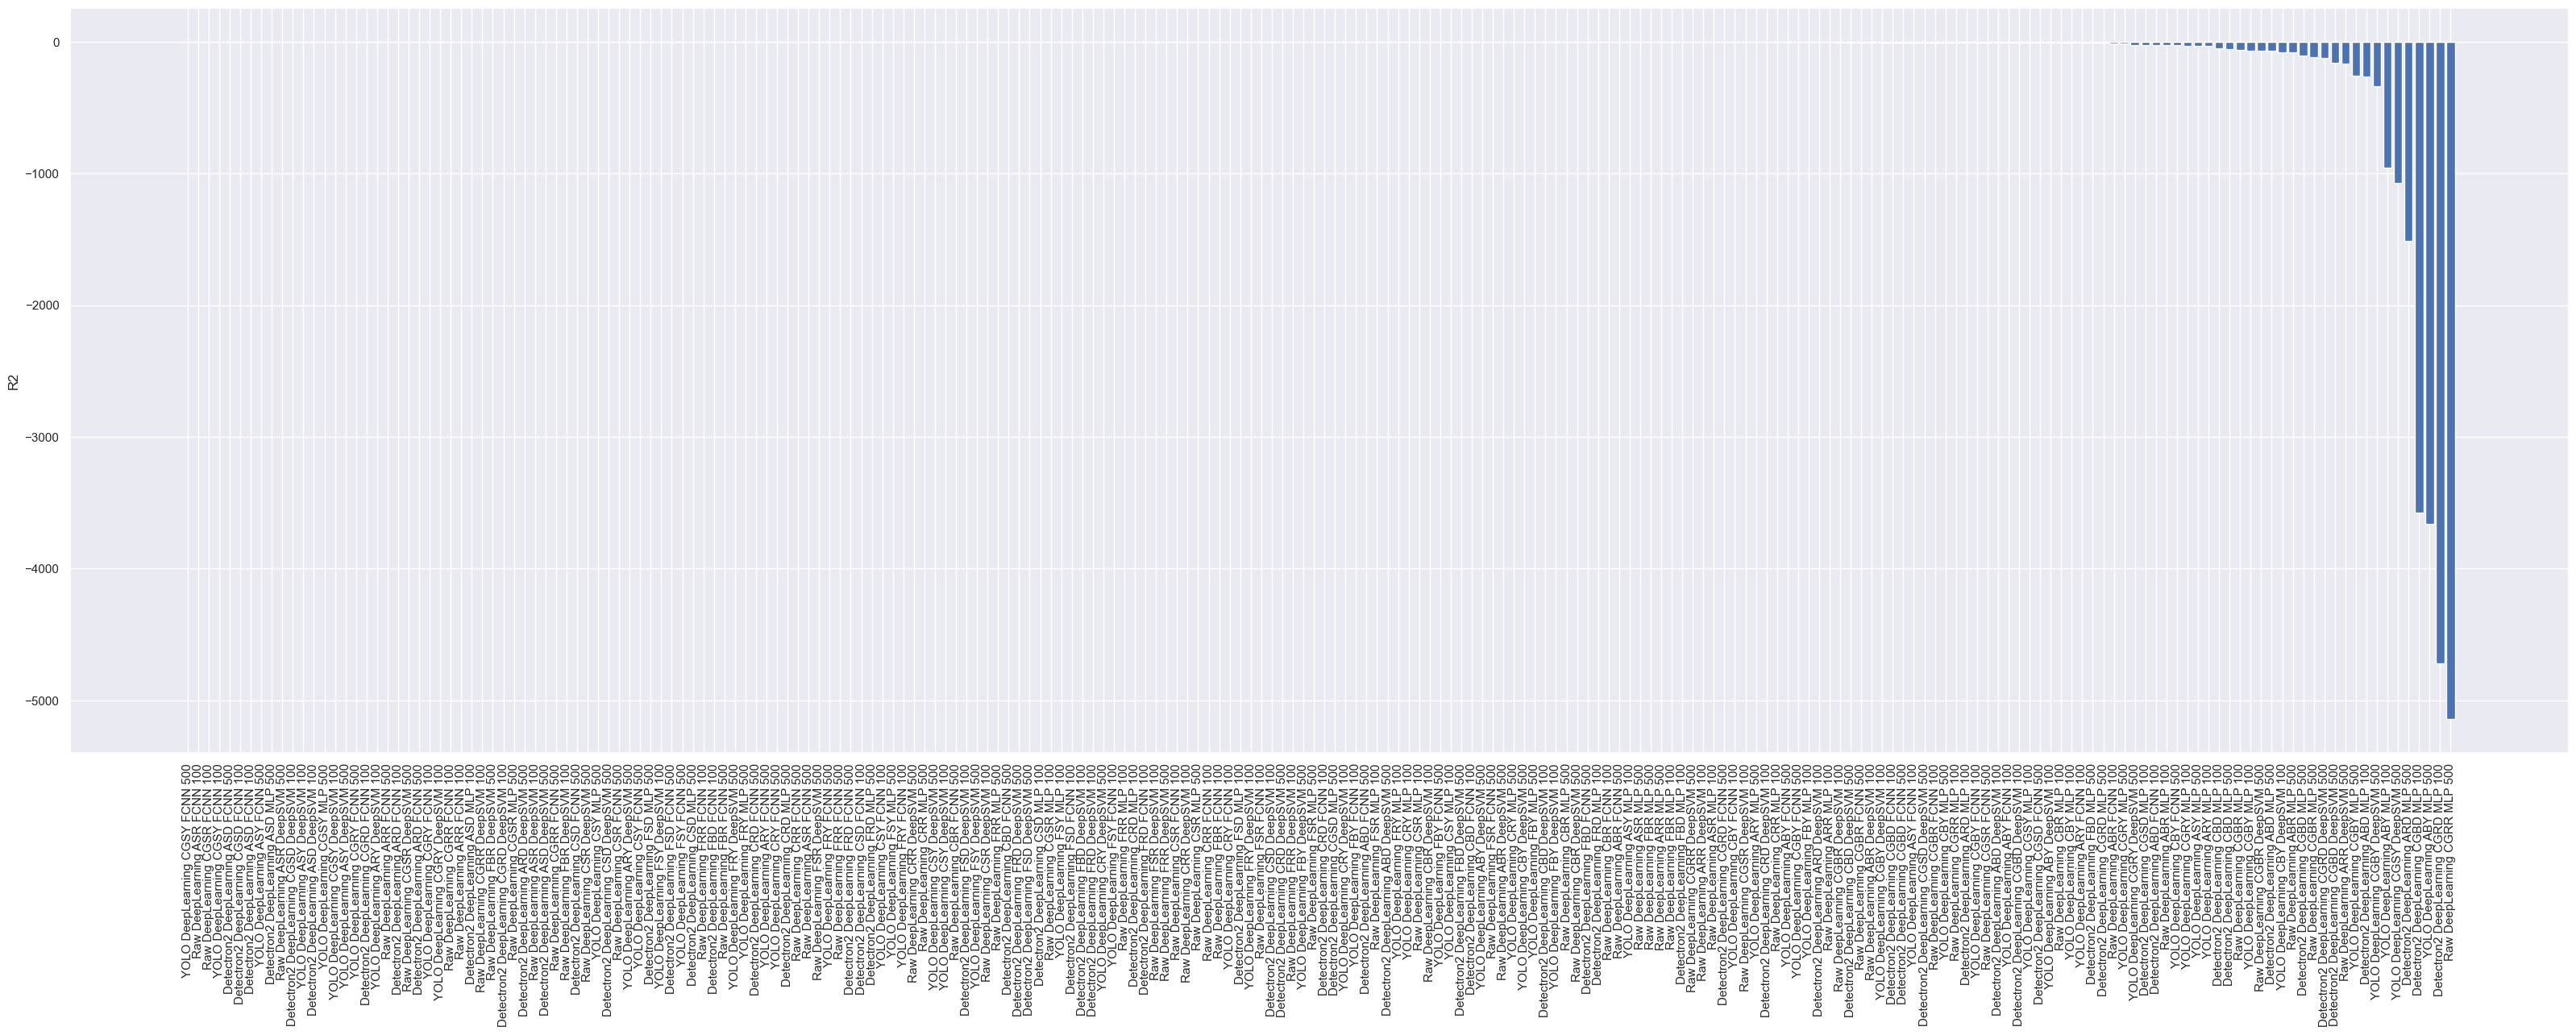

In [249]:
plot_r2_by_class(resultsDL)

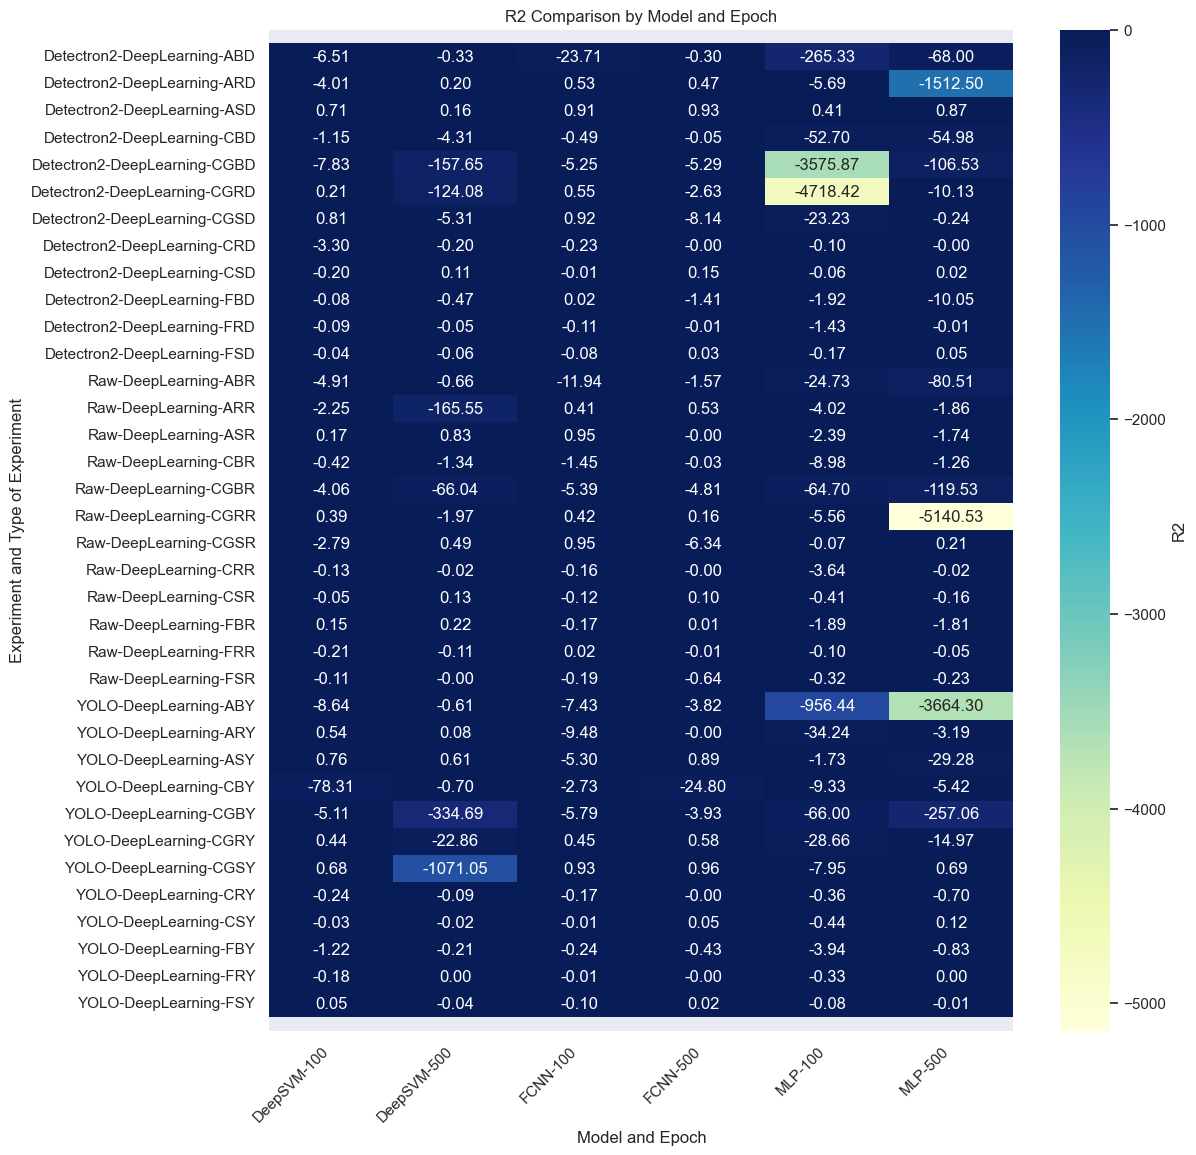

In [233]:
plot_r2_heatmap(resultsDL)


[['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'r2', -64.701839859492], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'loss', 18.549575805664062], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'mse', 18.549575805664062], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'mae', 4.2672224044799805], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'rmse', 4.30692195892334], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'r2', -119.53302798603754], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'loss', 85.44715881347656], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'mse', 85.44715881347656], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'mae', 9.205338478088379], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'rmse', 9.243762969970703], ['Raw', 'DeepLearning', 'CGBR', 'FCNN', '100', 'r2', -5.38604791020252], ['Raw', 'DeepLearning', 'CGBR', 'FCNN', '100', 'loss', 2.576350450515747], ['Raw', 'DeepLearning', 'CGBR', 'FCNN', '100', 'mse', 2.576350450515747], ['Raw', 'DeepLearning', 'CGBR', 'FCNN', '1

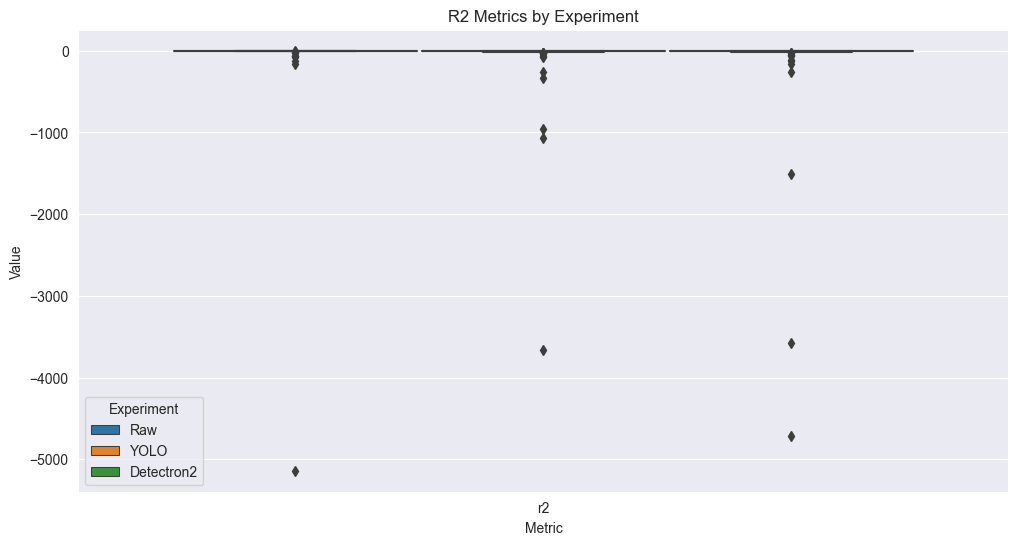

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
edgecolors=None
data = resultsDL

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["Experiment", "","Fruit","Model","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Experiment", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Experiment")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

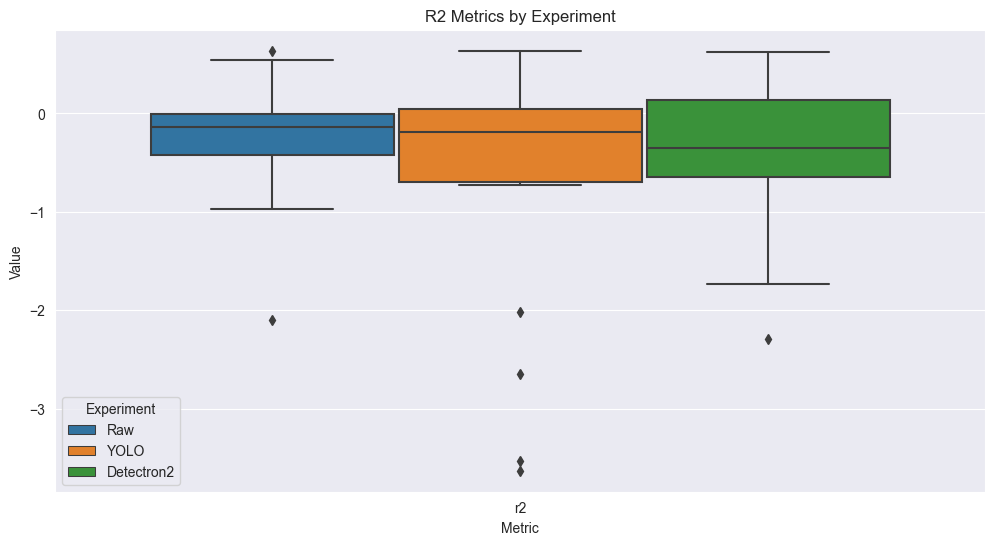

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
edgecolors=None
data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Experiment", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Experiment")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

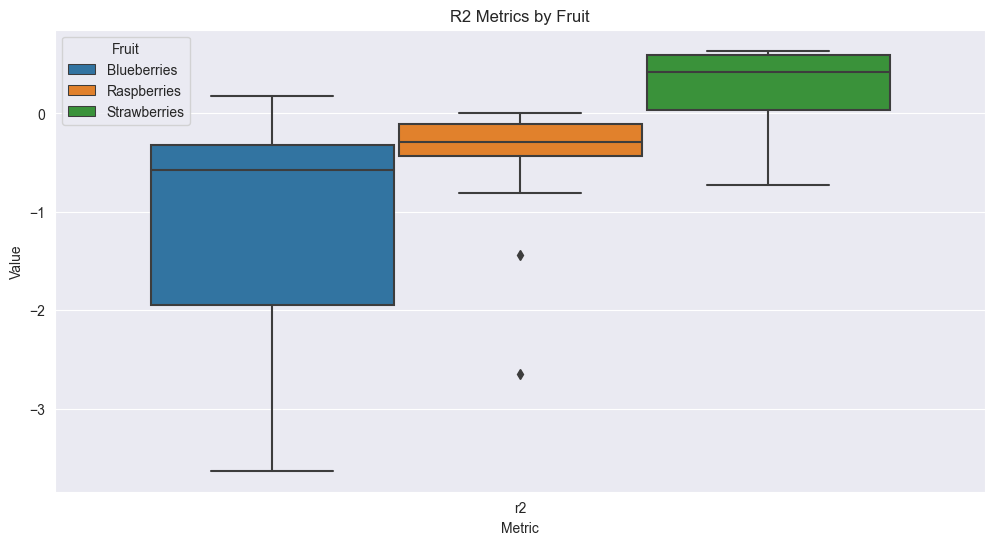

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#AQUI HAY QUE DARLE EL JSON MODIFICADO PARA QUE JALE
data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Fruit", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Fruit")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

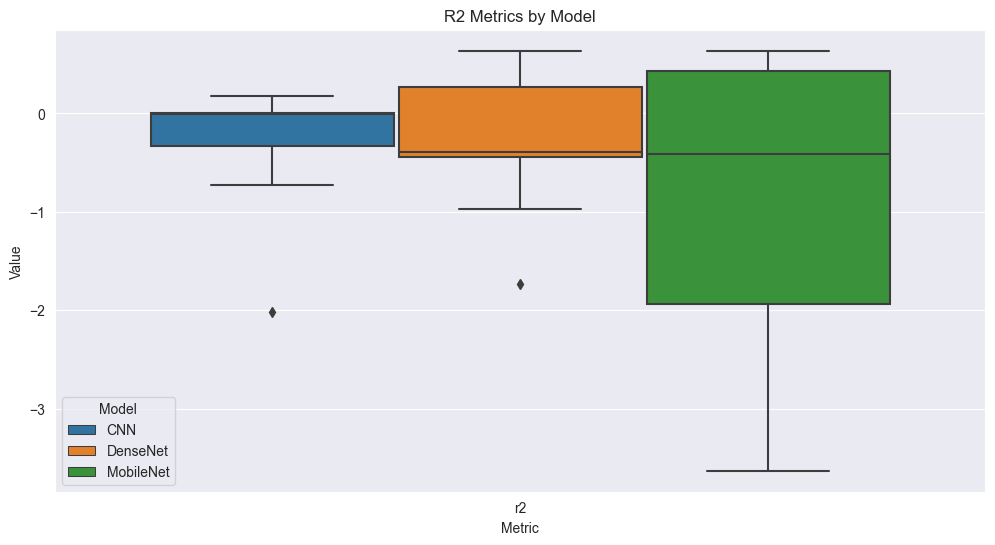

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])


plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
#swarmplot = sns.swarmplot(x="Model", y="Value", hue="Experiment", data=df, dodge=True, color=".25", ax=boxplot)


plt.title("R2 Metrics by Model")
plt.show()


{'Experiment': {'Raw': {'Fruits': {'Blueberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.004041072212986885}, '300': {'r2': -0.28635505761112245}}}, 'DenseNet': {'Epochs': {'100': {'r2': -0.44493061337426054}, '300': {'r2': -0.9744979839520378}}}, 'MobileNet': {'Epochs': {'100': {'r2': -0.5500927296410199}, '300': {'r2': -2.0988388365925834}}}}}, 'Raspberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.007139206571461276}, '300': {'r2': -0.004507288967530609}}}, 'DenseNet': {'Epochs': {'100': {'r2': -0.14746271950135226}, '300': {'r2': -0.3631432992968082}}}, 'MobileNet': {'Epochs': {'100': {'r2': -0.8085655605885449}, '300': {'r2': -0.127935126939972}}}}}, 'Strawberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.008424935786062182}, '300': {'r2': -0.3435609713584966}}}, 'DenseNet': {'Epochs': {'100': {'r2': 0.5412729376409295}, '300': {'r2': 0.2824198614051018}}}, 'MobileNet': {'Epochs': {'100': {'r2': 0.6313476882820155}, '300': {'r2': 0.4424399524643087}}}}}}}, 'Y

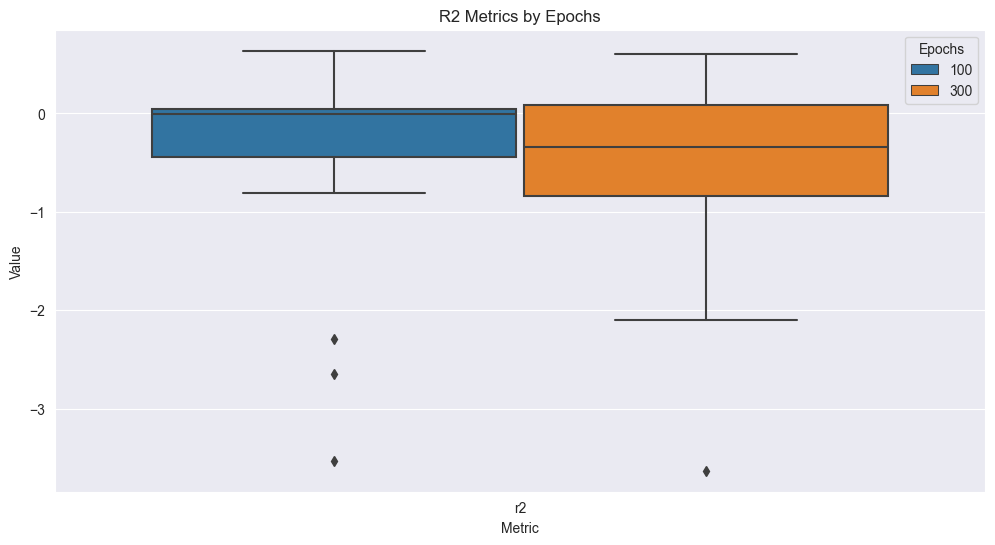

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

print(data)

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, type(dict)):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Epochs", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()


In [6]:
print(resultsCNN)

{'Raw': {'Images': {'CIBR': {'CNN': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}, 'DenseNet': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}, 'MobileNet': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.1352005004882812}}}, 'CIRR': {'CNN': {'100': {'r2': -0.007139206571461276, 

{'Raw': {'Images': {'CIBR': {'CNN': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}, 'DenseNet': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}, 'MobileNet': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.1352005004882812}}}, 'CIRR': {'CNN': {'100': {'r2': -0.007139206571461276, 

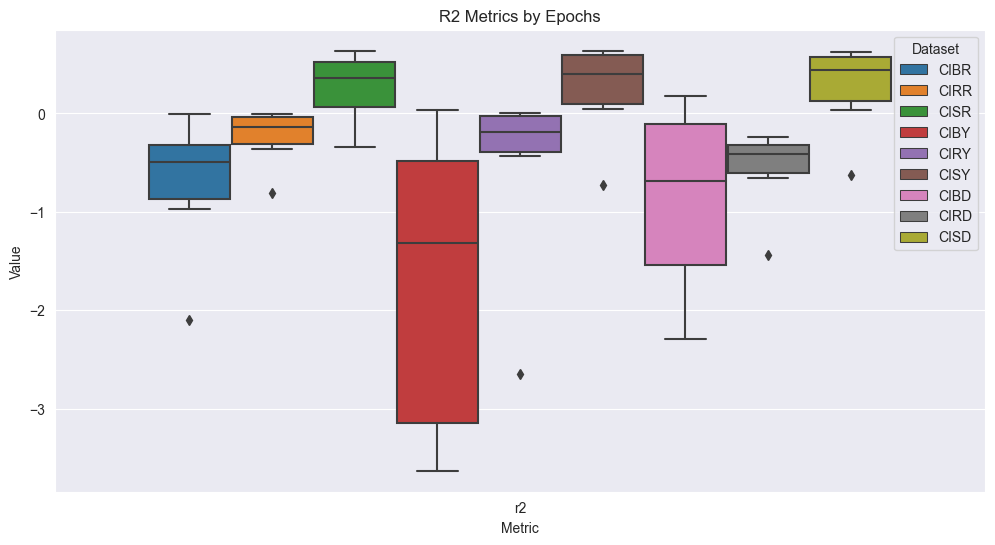

In [106]:
diction = {}

with open('resultsCNNAll.json') as json_file:
    diction = json.load(json_file)



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = diction

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, type(dict)):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

print(data)

flat_data = list(flatten_json(data))

print(flat_data)
df = pd.DataFrame(flat_data, columns=["Experiment", "" ,"Dataset","Model","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Dataset", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()


{'Raw': {'DeepLearning': {'CGBR': {'MLP': {'100': {'r2': -64.701839859492, 'loss': 18.549575805664062, 'mse': 18.549575805664062, 'mae': 4.2672224044799805, 'rmse': 4.30692195892334}, '500': {'r2': -119.53302798603754, 'loss': 85.44715881347656, 'mse': 85.44715881347656, 'mae': 9.205338478088379, 'rmse': 9.243762969970703}}, 'FCNN': {'100': {'r2': -5.38604791020252, 'loss': 2.576350450515747, 'mse': 2.576350450515747, 'mae': 1.3141248226165771, 'rmse': 1.6051013469696045}, '500': {'r2': -4.810571955260061, 'loss': 2.7025272846221924, 'mse': 2.7025272846221924, 'mae': 1.357565999031067, 'rmse': 1.6439365148544312}}, 'DeepSVM': {'100': {'r2': -4.055664748611606, 'loss': 2.6975085735321045, 'mse': 2.6625924110412598, 'mae': 1.2837483882904053, 'rmse': 1.6317452192306519}, '500': {'r2': -66.04184856391224, 'loss': 23.51694679260254, 'mse': 23.481536865234375, 'mae': 4.821601867675781, 'rmse': 4.845775127410889}}}, 'FBR': {'MLP': {'100': {'r2': -1.893789621843018, 'loss': 1.2066375017166138

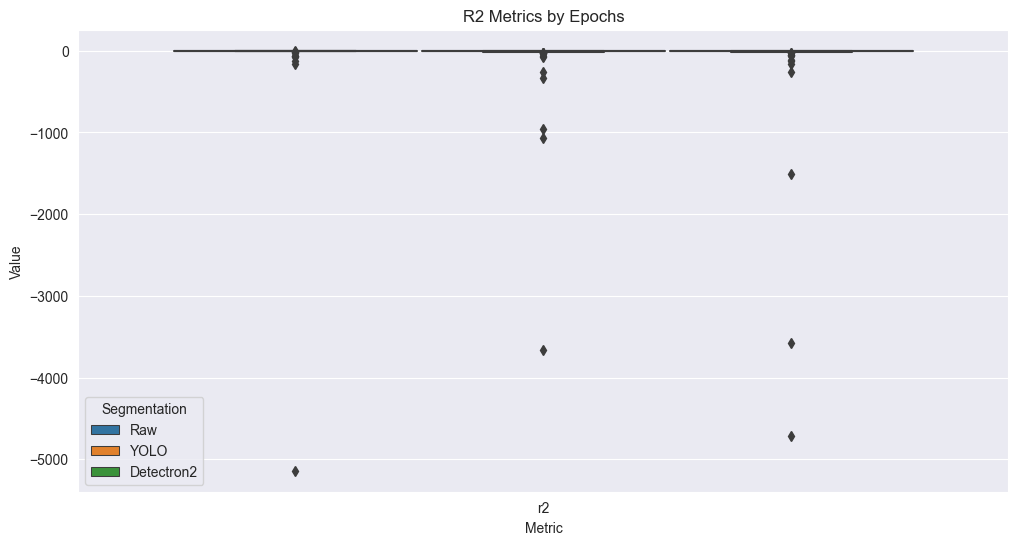

In [110]:
deeplearningresults = {}

with open('resultsDeepLearningC.json') as json_file:
    deeplearningresults = json.load(json_file)



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = deeplearningresults

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, type(dict)):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

print(data)

flat_data = list(flatten_json(data))

print(flat_data)
df = pd.DataFrame(flat_data, columns=["Segmentation", "" ,"Dataset","Model","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Segmentation", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()
